# <b>Introduction<b>

In [3]:
import warnings
def warn(*arg, **kwarg):
    pass
warnings.warn = warn

In [4]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import glob
import json

In [5]:
from pattern.en import pluralize, singularize

## <b>Import libraries<b>

In [6]:
import py2neo
from py2neo import Graph
import jgraph as IGraph
from IPython.display import Image
from IPython.core.display import HTML 

import numpy as np
import pandas as pd

# Other
import re
import string

# NLTK
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

## Plot
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import matplotlib as plt

## <b> Data Processing<b>

In [7]:
root_path = './CORD-19-research-challenge'
metadata_path = f'{root_path}/all_sources_metadata_2020-03-13.csv'

In [8]:
metadata_path

'./CORD-19-research-challenge/all_sources_metadata_2020-03-13.csv'

In [9]:
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_full_text
0,c630ebcdf30652f0422c3ec12a00b50241dc9bd9,CZI,Angiotensin-converting enzyme 2 (ACE2) as a SA...,10.1007/s00134-020-05985-9,NaN,32125455,cc-by-nc,NaN,2020,"Zhang, Haibo; Penninger, Josef M.; Li, Yimin; ...",Intensive Care Med,2002765492,#3252,True
1,53eccda7977a31e3d0f565c884da036b1e85438e,CZI,Comparative genetic analysis of the novel coro...,10.1038/s41421-020-0147-1,NaN,NaN,cc-by,NaN,2020,"Cao, Yanan; Li, Lin; Feng, Zhimin; Wan, Shengq...",Cell Discovery,3003430844,#1861,True
2,210a892deb1c61577f6fba58505fd65356ce6636,CZI,Incubation Period and Other Epidemiological Ch...,10.3390/jcm9020538,NaN,NaN,cc-by,The geographic spread of 2019 novel coronaviru...,2020,"Linton, M. Natalie; Kobayashi, Tetsuro; Yang, ...",Journal of Clinical Medicine,3006065484,#1043,True
3,e3b40cc8e0e137c416b4a2273a4dca94ae8178cc,CZI,Characteristics of and Public Health Responses...,10.3390/jcm9020575,NaN,32093211,cc-by,"In December 2019, cases of unidentified pneumo...",2020,"Deng, Sheng-Qun; Peng, Hong-Juan",J Clin Med,177663115,#1999,True
4,92c2c9839304b4f2bc1276d41b1aa885d8b364fd,CZI,Imaging changes in severe COVID-19 pneumonia,10.1007/s00134-020-05976-w,NaN,32125453,cc-by-nc,NaN,2020,"Zhang, Wei",Intensive Care Med,3006643024,#3242,False


In [10]:
meta_df.shape

(29500, 14)

In [11]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

13202

In [12]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            self.title = content['metadata']['title']
            # Abstract
            for entry in content['abstract']:
                self.abstract.append(entry['text'])
            # Body text
            for entry in content['body_text']:
                self.body_text.append(entry['text'])
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
            # Extend Here
            #
            #
    def __repr__(self):
        return f'{self.paper_id}: {self.title}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

8f8eb4f004c2002face0723f2f58cc411954d36e: Complete Genome Sequence of Bordetella bronchiseptica Strain KM22: Bordetella bronchiseptica isolate KM22 has been used in experimental infections of swine as a model of clinical B. bronchiseptica infection and to study host-to-host transmission. The draft genome seq... 20-kb insert library preparation protocol (https://www.pacb.com/wp-content/uploads/ Procedure-Checklist-20-kb-Template-Preparation-Using-BluePippin-Size-Selection -System.pdf). The 20-kb library was s...


In [13]:
dict_ = {'paper_id': [], 'title': [], 'abstract': [], 'body_text': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    content = FileReader(entry)
    dict_['paper_id'].append(content.paper_id)
    dict_['title'].append(content.title)
    dict_['abstract'].append(content.abstract)
    dict_['body_text'].append(content.body_text)
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'title', 'abstract', 'body_text'])
df_covid.head()


Processing index: 0 of 13202
Processing index: 1320 of 13202
Processing index: 2640 of 13202
Processing index: 3960 of 13202
Processing index: 5280 of 13202
Processing index: 6600 of 13202
Processing index: 7920 of 13202
Processing index: 9240 of 13202
Processing index: 10560 of 13202
Processing index: 11880 of 13202
Processing index: 13200 of 13202


,paper_id,title,abstract,body_text
0,8f8eb4f004c2002face0723f2f58cc411954d36e,Complete Genome Sequence of Bordetella bronchi...,Bordetella bronchiseptica isolate KM22 has bee...,20-kb insert library preparation protocol (htt...
1,63f7049d200896290b38b38711113054f7ea1b50,,,I nfectious diseases have been an ever-present...
2,4df45b8404d9de0b376a8ae3c282a517df36fe51,Two novel HLA-A*0201 T-cell epitopes in avian ...,The influenza A nucleoprotein (NP) is an attra...,The transmission of a pathogenic avian H5N1 vi...
3,e0737ee93afe7b0bf06b1e3f9adf21d541dd10f0,Protective Effects of Long Pentraxin PTX3 on L...,The outbreak of severe acute respiratory syndr...,acute lung injury; inflammatory response; neut...
4,3c3572ba243d61e7631725669c8f88347fdbd5bc,Veterinary Science Short Communication Prevale...,The prevalence of feline herpesvirus-1 (FHV-1)...,Feline herpesvirus type 1 (FHV-1) is the most ...


In [14]:
df_covid.loc[2, 'abstract']

'The influenza A nucleoprotein (NP) is an attractive target for avian flu vaccine development because of its high conversancy in the evolutionary chain of the virus. Here we identified two novel HLA-A*0201 restricted NP epitopes, named H5N1 NP373-381 AMDSNTLEL (NP373) and NP458-466 FQGRGVFEL (NP458), using computational bioinformatic analysis. The NP peptides showed a high binding affinity to HLA-A*0201 on T2 cells, and were able to induce the activation of the cytotoxic T cells in the human peripheral blood mononuclear cells. We examined the potential of using NP373 and NP458 peptide sequences supplemented with a single-chain trimer as potential DNA vaccine candidates in an HHD transgenic mouse model. A gene gun delivery system was used for administrating the vaccine candidates into the animals. The results from cytotoxicity and ELISPOT assays indicated that a significant amount of IFN-c was secreted by the T cells of the vaccinated mice, and the T cells were able to eliminate the cor

In [15]:
df_covid.drop_duplicates(['title'], inplace=True)
df_covid.drop_duplicates(['abstract'], inplace=True)
df_covid.drop_duplicates(['body_text'], inplace=True)

In [16]:
df_covid.shape

(10683, 4)

In [18]:
def lower_case(input_str):
    input_str = input_str.lower()
    return input_str

df_covid['title'] = df_covid['title'].apply(lambda x: lower_case(x))
df_covid['body_text'] = df_covid['body_text'].apply(lambda x: lower_case(x))
df_covid['abstract'] = df_covid['abstract'].apply(lambda x: lower_case(x))

### Update stopwords

In [155]:
def regexReplcae(text):
    text = re.sub(r"\"", " ", text)
    text = re.sub(r"(\"?\')(\w)", " \2", text)
    text = re.sub(r"\?", " .", text)
    text = re.sub(r",", "", text)
    text = re.sub(r"\.\s?", " SEP.SEP ", text)
    text = re.sub(r"!", ".", text)
    text = re.sub(r":", "", text)
    text = re.sub(r"\s?\;\s?", "", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\(", "", text)
    text = re.sub(r"\)", "", text)
    text = re.sub(r"&", " ", text)
    text = re.sub(r"([A-z])\-([A-z])", r"\1 \2", text)
    text = re.sub(r"viruses", "virus", text)
    text = re.sub(r"proteins", "protein", text)
    text = re.sub(r"genes", "gene", text)
    text = re.sub(r"pathogens", "pathogen", text)
    text = re.sub(r"cells", "cell", text)
    text = re.sub(r"drugs", "drug", text)
    text = re.sub(r"vaccines", "vaccine", text)
    text = re.sub(r"vaccination", "vaccine", text)
    text = re.sub(r"genomes", "gene", text)
    text = re.sub(r"genotypes", "genotype", text)
    text = re.sub(r"diseases", "disease", text)
    text = re.sub(r"pathogenesis", "pathogen", text)
    text = re.sub(r"pathogeneis", "pathogen", text)
    text = re.sub(r"pathogenic", "pathogen", text)
    text = re.sub(r"infections", "infection", text)
    text = re.sub(r"infected", "infection", text)
    text = re.sub(r"antibodies", "antibody", text)
    text = re.sub(r"zikv", "zikavirus", text)
    text = re.sub(r"zika", "zikavirus", text)
    text = re.sub(r"bats", "bat", text)
    text = re.sub(r"dogs", "dog", text)
    text = re.sub(r"cats", "cat", text)
    text = re.sub(r"sequences", "sequence", text)
    text = re.sub(r"experiments", "experiment", text)
    text = re.sub(r"sequencing", "sequence", text)
    text = re.sub(r"author\s?", "", text)
    text = re.sub(r"corresponding\s?", "", text)
    text = re.sub(r"inhibited", "inhibit", text)
    text = re.sub(r"inhibitor", "inhibit", text)
    text = re.sub(r"adults", "adult", text)   
    text = re.sub(r"interactions", "interaction", text)
    text = re.sub(r"[^\s@]+@[^\s@]+\.[^\s@]{2,}", " ", text)
    return text

### Stop words

In [156]:
all_text = ' '.join(df_covid['abstract'])
all_text = regexReplcae(all_text)

In [157]:
allWords = nltk.tokenize.word_tokenize(all_text)
allWordDist = nltk.FreqDist(w.lower() for w in allWords)

In [158]:
freq_df = pd.DataFrame(allWordDist.items()).rename(columns = {0:'word', 1: 'count'})
freq_df.sort_values(by = ['count'], ascending = False, inplace= True)

In [159]:
freq_df[freq_df['count'] <= 1].count()

word     37848
count    37848
dtype: int64

In [160]:
df = list(freq_df[freq_df['count'] >1000 ]['count'])

In [161]:
freq_df.shape

(76300, 2)

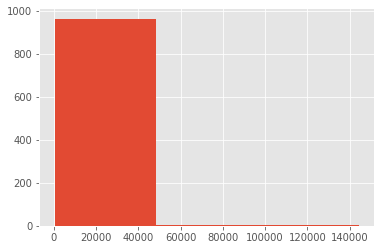

In [212]:
import matplotlib.pyplot as plt
plt.hist(freq_df[freq_df['count'] >400]['count'], bins = 3, density=False);

In [190]:
print(f'Stop words from histogram: {len(list(freq_df[freq_df["count"]  >= 400]["word"]))}')

Stop words from histogram: 974


In [191]:
from stopwords_list import stopwords_list
updated_stopwords = list(set(stopwords.words("english")).union(set(stopwords_list)))
print(f'Total number of stopwords: {len(updated_stopwords)}')

Total number of stopwords: 2796


### Clean text

In [201]:
def clean_text(text):
    text = regexReplcae(text)
    text = text.lower().split()
    text = [w for w in text if w not in updated_stopwords  and len(w) > 2]
    aa = nltk.pos_tag(text)
    text = [pair[0] for pair in aa if pair[1] == 'NNS' or pair[1] == 'NN' or pair[1] == 'NNP' or pair[1] == 'NNPS' or  pair[1] == 'CC' or pair[1] == 'RB' or pair[1] == 'sep.sep']
    text = " ".join(text)
    text = re.sub(r"\s?sep\.sep\s?", ". ", text)
    
    if text is None:
        return na
    else:
        return text

In [202]:
df_covid['processed_title'] = df_covid['title'].map(lambda x: clean_text(x))
df_covid['processed_abstract'] = df_covid['abstract'].map(lambda x: clean_text(x))

In [203]:
df_covid.head(20)

,paper_id,title,abstract,body_text,processed_title,processed_abstract
0,8f8eb4f004c2002face0723f2f58cc411954d36e,complete genome sequence of bordetella bronchi...,bordetella bronchiseptica isolate km22 has bee...,20-kb insert library preparation protocol (htt...,sequence bordetella bronchiseptica km22,bordetella bronchiseptica isolate km22 infecti...
1,63f7049d200896290b38b38711113054f7ea1b50,,,i nfectious diseases have been an ever-present...,,
2,4df45b8404d9de0b376a8ae3c282a517df36fe51,two novel hla-a*0201 t-cell epitopes in avian ...,the influenza a nucleoprotein (np) is an attra...,the transmission of a pathogenic avian h5n1 vi...,hla a*0201 cell nucleoprotein hhd mice,influenza nucleoprotein flu vaccine conversanc...
3,e0737ee93afe7b0bf06b1e3f9adf21d541dd10f0,protective effects of long pentraxin ptx3 on l...,the outbreak of severe acute respiratory syndr...,acute lung injury; inflammatory response; neut...,pentraxin ptx3 lung injury respiratory syndrom...,respiratory syndrome sars reinforces pandemics...
4,3c3572ba243d61e7631725669c8f88347fdbd5bc,veterinary science short communication prevale...,the prevalence of feline herpesvirus-1 (fhv-1)...,feline herpesvirus type 1 (fhv-1) is the most ...,science communication herpesvirus calicivirus ...,calicivirus fcv chlamydophila. felis cats. cat...
6,4cb9c6ef889605b3149ab8b59c8258074067ba04,detection of group 1 coronaviruses in bats in ...,the epidemic of severe acute respiratory syndr...,e merging diseases are frequently zoonoses cau...,coronavirus bat north america,respiratory sars newly coronavirus sars bat ha...
8,cf3640a2e06457c47beac679ac651bc69f7c9521,common commercial cosmetic products induce art...,"many different agents, incding mineri oil and ...","many different agents, incding mineri oil and ...",products rat,agents oil silicone act adjuvants activaton st...
11,bf73a62e8d870d8edd2bd1fb2ca68424e2e8b7d9,public antibodies to malaria antigens generate...,we previously described two donors in whom the...,individuals living in malaria-endemic regions....,antibody malaria insertion modalities,donors receptor chromosome segments antibody i...
13,18acb42cf96716cbb91dd26e491e253cc130cb78,isolation and characterization of a bat sars-l...,the 2002-3 pandemic caused by severe acute res...,rs3367. these viruses are far more closely rel...,characterization bat sars receptor,respiratory syndrome coronavirus sars
15,943f2beb4d32bce84617c72677a277224b73fd8f,lack of sars transmission among public hospita...,the severe acute respiratory syndrome (sars) o...,v ietnam was one of the first countries affect...,sars transmission workers,respiratory syndrome sars transmission sars do...


### Data modeling for text

In [205]:
CREATE_MODEL = '''
CREATE 
  (`0` :Word ) ,
  (`1` :Word ) ,
  (`0`)-[:`NEXT_WORD` ]->(`1`)
'''

DELETE_EXISTING_DATA = '''MATCH (n) DETACH DELETE n'''
CREATE_WORD_CONSTRAINT = '''CREATE CONSTRAINT ON (W:Word) ASSERT W.name IS UNIQUE;'''

INSERT_DATA = '''
WITH split($sentence, " ") as words
unwind range(0,size(words)-2) as idx

MERGE (w1:Word {name: words[idx]})
  ON CREATE SET w1.count = 1 ON MATCH SET w1.count =  1 + w1.count

MERGE (w2:Word {name: words[idx+1]})
  ON CREATE SET w2.count = 1 ON MATCH SET w2.count =  1 + (case when idx = size(words)-2 then 1 else 0 end)

MERGE (w1)-[NW: NEXT_WORD]->(w2)
  ON CREATE SET NW.count = 1 ON MATCH SET NW.count = 1 + NW.count
'''

### Export Data to Ne04j

In [206]:
graph = Graph("bolt://localhost:7687", auth = ("neo4j", 'sabber251188'))

In [207]:
graph.delete_all()
graph.run(DELETE_EXISTING_DATA)
graph.run(CREATE_MODEL)
# graph.run(CREATE_WORD_CONSTRAINT)

In [208]:
for lines in df_covid['processed_abstract']:
    aa = lines.split('.')
    for sentence in aa:
        if sentence != "":
            graph.run(INSERT_DATA, parameters = {'sentence': sentence.strip()})

### Graph analysis

In [209]:
DELETE_EMPTY_NODE = """
MATCH (n { name:"" })
DETACH DELETE n
"""
graph.run(DELETE_EMPTY_NODE)

### Export to Gephi

In [ ]:
MATCH path = (:Word)-[:NEXT_WORD]->(:Word)
with collect(path) as paths
call apoc.gephi.add(null,'workspace1', paths) yield nodes, relationships, time
return *

In [ ]:
MATCH path = (:Word{name:"coronavirus"})-[:NEXT_WORD]->(:Word{name:"drug"})-[:NEXT_WORD]->(:Word)
with collect(path) as paths
call apoc.gephi.add(null,'drug', paths) yield nodes, relationships, time
return *

### Query

In [221]:
def get_neighbors(word = "virus"):
    Query = """
    MATCH (W1:Word{name:$concept})-[R:NEXT_WORD]->(W2:Word{name:"transmission"})-[R2:NEXT_WORD]->(W3:Word)
    RETURN W3.name LIMIT 1000
    """
    print(graph.run(Query, parameters = {"concept": word}).to_table())

In [222]:
print(get_neighbors(word = "coronavirus"))

 W3.name            
--------------------
 predators          
 mites              
 honeybees          
 [21]               
 enables            
 ants               
 rio                
 families           
 bascs              
 masks              
 lung               
 loxp               
 fvs                
 companion          
 closely            
 interacts          
 survival           
 perform            
 clearly            
 loads              
 assessment         
 disproportionally  
 almost             
 tohuman            
 indeed             
 side               
 supports           
 significance       
 inefficient        
 reveal             
 ward               
 question           
 methodology        
 ebolavirus         
 asia               
 mdros              
 airborne           
 saudi              
 hierarchy          
 homes              
 fomites            
 office             
 behaviour          
 graduate           
 officials          
 mdv         

In [213]:
def get_neighbors(word = "virus"):
    Query = """
    MATCH (W1:Word{name:$concept})-[R:NEXT_WORD]->(W2:Word) RETURN W1.name, R.weight, W2.name ORDER BY R.weight desc LIMIT 20
    """
    print(graph.run(Query, parameters = {"concept": word}).to_table())

In [214]:
get_neighbors(word = "gene")

 W1.name | R.weight | W2.name        
---------|----------|----------------
 gene    |     null | series         
 gene    |     null | blastn         
 gene    |     null | qtl            
 gene    |     null | inflammasomes  
 gene    |     null | proliferator   
 gene    |     null | modules        
 gene    |     null | enrollment     
 gene    |     null | timepoints     
 gene    |     null | transformation 
 gene    |     null | containment    
 gene    |     null | marv           
 gene    |     null | introns        
 gene    |     null | cdnas          
 gene    |     null | lectin         
 gene    |     null | stimulus       
 gene    |     null | density        
 gene    |     null | hla            
 gene    |     null | ligase         
 gene    |     null | alt            
 gene    |     null | tcrv           



In [189]:
aa = extract_subgraph(K, label = 'think')